# Teenage Pandas
In this intermediate course on Pandas, we're going to continue analyzing our beer data. This is intentional so as to allow you to clearly see how we have increased the complexity in the data preprocessing and analysis here as compared to the Baby Pandas course. 

## Getting Started
Let's start with the basics.
- Import statements
    - We're going to make an additional import here: `import warnings` followed by a command to ignore the warnings. We do this so that we can focus our entire attention on Pandas. But during your projects, I recommend taking into account every warning you come across. Some of them contain useful information about versioning, deprecation of methods in future releases etc.
- Loading the data into a Pandas DataFrame
- Observing the first 5 values of the DataFrame
- Observing the details of the DataFrame using the `info()` method

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('Updated Cans of Beer.csv')

In [4]:
df.head()

,Date,Year,Temperature,Cans of beer sold
0,1-Jun,2010,71,9150
1,20-Jun,2010,81,10084
2,12-Jul,2010,71,9242
3,28-Jul,2010,83,10361
4,3-Aug,2010,65,8829


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
Date                 37 non-null object
Year                 37 non-null int64
Temperature          37 non-null int64
Cans of beer sold    37 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


### Something's not right

The updated CSV file was supposed to hold our manipulated DataFrame but on observing the output of the `info()` method, it looks just like our original DataFrame! 

What happened?

> - Even though _Year_ was type cast as a `category` in Pandas, there's nothing like a categorical datatype in CSV files. Therefore, on loading the CSV into Pandas, we lost the type casting that we had performed. This just goes to show why CSV files or even Excel spreadsheets are not a good choice when analysing data. Libraries like Pandas are so popular for a reason!

Let's perform our _Year_ type casting once again. 

In [6]:
df['Year'] = df['Year'].astype('category')

## Data Preprocessing
We performed some interesting EDA in the previous course and even scratched the surface of Data Preprocessing when we converted _Year_ into a categorical variable. 

One column we didn't really look at is the _Date_ column which stores the month and day values in the form of an `object`. Python offers us a more suitable datatype to handle date and time variables, known as `datetime`. The biggest advantage is that we will, very easily, be able to plot a time series against this dataset to see how the sales of beer have been changing over time. 

So here's what we're going to do:

### 1. Perform a row-wise concatenation of the Year and Date columns.

This is done so that we have a single column containing the day, month and year.

For example, 

Date | Year | New Date
--- | --- | ---
1-Jun | 2010 | 1-Jun-2010
20-Jun | 2010 | 20-Jun-2010

Joining 2 columns in Pandas is as simple as putting a plus (+) sign between them! 

**Note**: This only works if both columns are of the same datatype therefore we first convert _Year_ into an `object` so that it matches the `object` datatype of _Date_ and then perform the concatenation of both columns.

**Also note**: Syntactically, `astype()` takes the argument `str`, but on running `info()` we observe that the datatype of _New Date_ has been type cast as `object.`

In [7]:
df['New date'] = df['Date'] + df['Year'].astype(str)

In [8]:
df.head()

,Date,Year,Temperature,Cans of beer sold,New date
0,1-Jun,2010,71,9150,1-Jun2010
1,20-Jun,2010,81,10084,20-Jun2010
2,12-Jul,2010,71,9242,12-Jul2010
3,28-Jul,2010,83,10361,28-Jul2010
4,3-Aug,2010,65,8829,3-Aug2010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date                 37 non-null object
Year                 37 non-null category
Temperature          37 non-null int64
Cans of beer sold    37 non-null int64
New date             37 non-null object
dtypes: category(1), int64(2), object(2)
memory usage: 1.5+ KB


### 2. Type cast the newly created date column to datetime.

Pandas offers a method known as `to_datetime()`, which type casts a given string as a `datetime` object. We're going to pass it 2 arguments:
- the string that needs to be type cast. In our case: _df['New date']_
- the format that the string is in so that the interpreter can understand which part of the string is the day, which part is the month and which part is the year.

Read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

> - In our case, _New date_ looks like 1-Jun2010:
> - It has the day
> - followed by a hyphen
> - followed by the abbreviated month in letters
> - followed by the year in 4 digits. 

Referencing the below table, _New date_ can be mapped as `'%d-%b%Y'`:

Code | Meaning | Example
--- | --- | ---
%d | Day of the month as a zero-padded decimal number. | 30
%b | Month as locale’s abbreviated name. | Sep
%B | Month as locale’s full name. | September
%m | Month as a zero-padded decimal number. | 09
%y | Year without century as a zero-padded decimal number. | 13
%Y | Year with century as a decimal number. | 2013

Refer to the full table [here](https://strftime.org/).

In [10]:
df['New date'] = pd.to_datetime(df['New date'], format = '%d-%b%Y')

In [11]:
df.head()

,Date,Year,Temperature,Cans of beer sold,New date
0,1-Jun,2010,71,9150,2010-06-01
1,20-Jun,2010,81,10084,2010-06-20
2,12-Jul,2010,71,9242,2010-07-12
3,28-Jul,2010,83,10361,2010-07-28
4,3-Aug,2010,65,8829,2010-08-03


#### Output explained:
Observe the difference in how _New date_ looks as compared to earlier. It now has the format 2010-06-01. But where did that format come from? We didn't specify anything like it! 
> - The `to_datetime()` method type casts into the standard Pandas `datetime` format, where:
> - the 4 digit year is 
> - followed by a hyphen 
> - followed by the 2 digit month 
> - followed by another hyphen 
> - followed by the 2 digit day. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date                 37 non-null object
Year                 37 non-null category
Temperature          37 non-null int64
Cans of beer sold    37 non-null int64
New date             37 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2), object(1)
memory usage: 1.5+ KB


#### Output explained:

_New date_ now has the datatype `datetime64[ns]`. Pandas internally stores the date using nanosecond `[ns]` precision.

### 3. Store the columns that are not required in separate variables.

Now that we have our _New date_ column just the way we want it, we don't have any use for our old _Date_ and _Year_ columns. So, for ease for use and to keep our DataFrame as minimal as possible, we're going to store the unnecessary columns separately and remove them from the DataFrame. 

> - In the previous course, it was mentioned that we'd use the dot notation to access individual columns of a DataFrame - let's use it now! 

In [13]:
date_var = df.Date

In [14]:
date_var

0      1-Jun
1     20-Jun
2     12-Jul
3     28-Jul
4      3-Aug
5     16-Aug
6     29-Aug
7      2-Sep
8     19-Sep
9      5-Oct
10     1-Jun
11    20-Jun
12    20-Jun
13    12-Jul
14    28-Jul
15     3-Aug
16    16-Aug
17     2-Sep
18    19-Sep
19     5-Oct
20     1-Jun
21    20-Jun
22    12-Jul
23    28-Jul
24     3-Aug
25    16-Aug
26     2-Sep
27    19-Sep
28     5-Oct
29     1-Jun
30    20-Jun
31    20-Jun
32    12-Jul
33     3-Aug
34    16-Aug
35     2-Sep
36     5-Oct
Name: Date, dtype: object

#### Output explained: 

As we can see, our date variable, *date_var*, holds all 37 dates from our DataFrame which are of `object` datatype. 

We're already familiar with a Pandas DataFrame containing rows as well as columns but what structure does Pandas use when storing a single column? 

> - Use the in-built `type()` function to find the type of structure for *date_var*.

In [15]:
type(date_var)

pandas.core.series.Series

### Pandas Series
Pandas offers a structure to hold one-dimensional data known as a Series. A Pandas Series can be thought of as a single column from an Excel spreadsheet, capable of holding data of any datatype (strings, integers, floats, datetimes, categorical values etc). 

A Series can have a name as well as an index.

**Note:** In essence, a DataFrame is made up of multiple Series which are glued together to form a tabular structure!

> - Now that you know what a Series is, let's store the _Year_ column in a Series too so that we can eventually remove _Date_ and _Year_ from the DataFrame. 

In [16]:
year_var = df.Year

In [17]:
year_var

0     2010
1     2010
2     2010
3     2010
4     2010
5     2010
6     2010
7     2010
8     2010
9     2010
10    2011
11    2011
12    2011
13    2011
14    2011
15    2011
16    2011
17    2011
18    2011
19    2011
20    2012
21    2012
22    2012
23    2012
24    2012
25    2012
26    2012
27    2012
28    2012
29    2013
30    2013
31    2013
32    2013
33    2013
34    2013
35    2013
36    2013
Name: Year, dtype: category
Categories (4, int64): [2010, 2011, 2012, 2013]

In [18]:
type(year_var)

pandas.core.series.Series

### 4. Remove the unnecessary columns from the DataFrame.

In order to remove the columns from the DataFrame, we use the `drop()` method, which takes 2 arguments in our case:
- **labels:** the name of the labels to remove (either index labels or column labels)
    - Since we have to drop 2 columns, we pass them in as a list
- **axis:** how the removal should take place - row-wise or column-wise
    - 0 stands for 'index' (row-wise removal)
    - 1 stands for 'columns' (column-wise removal)

Read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). 

In [19]:
df = df.drop(labels = ['Date', 'Year'], axis = 1)

In [20]:
df.head()

,Temperature,Cans of beer sold,New date
0,71,9150,2010-06-01
1,81,10084,2010-06-20
2,71,9242,2010-07-12
3,83,10361,2010-07-28
4,65,8829,2010-08-03


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
Temperature          37 non-null int64
Cans of beer sold    37 non-null int64
New date             37 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1016.0 bytes


### 5. Rename columns.

Renaming columns in Pandas is as simple as `rename()`! This method is supplied the `columns` argument in the form of a dictionary where the current column name makes up the key and the new column name makes up the value. 

Read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html). 

In [22]:
df = df.rename(columns = {"Cans of beer sold": "Sales", "New date": "Date"})

In [23]:
df.head()

,Temperature,Sales,Date
0,71,9150,2010-06-01
1,81,10084,2010-06-20
2,71,9242,2010-07-12
3,83,10361,2010-07-28
4,65,8829,2010-08-03


## Time Series Analysis - Preprocessing

We want to plot our data as a time series - _Sales_ against _Date_ to observe how our sales change with time. Pandas makes it extremely easy to plot a time series when the following condition is met:

### Using a Datetime index
We want our DataFrame to be **indexed** using the datetime values, instead of having _Date_ as a data column in our DataFrame. 

We do that using the `set_index()` method, to which we provide 1 argument - the column name that we want to set as the index of the DataFrame. 

Read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html). 

In [24]:
df = df.set_index('Date')

In [25]:
df

,Temperature,Sales
Date,,
2010-06-01,71,9150
2010-06-20,81,10084
2010-07-12,71,9242
2010-07-28,83,10361
2010-08-03,65,8829
2010-08-16,71,9253
2010-08-29,85,10713
2010-09-02,81,10689
2010-09-19,67,8884


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2010-06-01 to 2013-10-05
Data columns (total 2 columns):
Temperature    37 non-null int64
Sales          37 non-null int64
dtypes: int64(2)
memory usage: 888.0 bytes


#### Output explained:

Observe the difference in the output for both the `head()` and `info()` method! 

### Unique Index

Since we have moved away from a RangeIndex to a DatetimeIndex, let's make sure all our index values are unique just as a sanity check. This may not be true for every dataset but in our case, we should not have 2 different values for _Temperature_ or _Sales_ for the same _Date_. 

Pandas provides a Boolean check in the form of an `is_unique` property, which as the name suggests, outputs: 
- True if the index values are unique
- False if the index values are not unique

In [27]:
df.index.is_unique

False

Aha! Caught the duplicate index values before it made its way into our analysis and corrupted it or biased it in any way. Let's find out which index values are not unique.

### Boolean Indexing/Conditional Selection

**Boolean indexing/conditional selection** is another useful feature that Pandas offers where subsets of data are selected based on the data values and not based on column names or index values. This is done by applying a filter/condition on the data values. Those values which satisfy the condition are then seen as the result. 

Let's use the `duplicated()` method on the index values of the DataFrame. 

In [28]:
df.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False])

#### Output Explained:

Observe the result:
- It contains True and False values which means that the `duplicated()` method checked the condition (whether they were duplicates or not) and resulted in a Boolean output. 
- It contains the entire DataFrame and not a filtered output, which is too cumbersome to go through. Even if we happen to find all the True values correctly, we still don't know which dates are duplicates.

> - This is where boolean indexing/conditional selection comes into play. Using the above condition as an argument to the DataFrame, instead of as a standalone command, helps us not only filter the output to retrieve the 2 True values but also gives us the exact dates where the condition is True. 

In our case, we pass the argument to `df.index` and not to _df_ because we're filtering on the index values of the DataFrame, not on the data values. 

In [29]:
df.index[df.index.duplicated()]

DatetimeIndex(['2011-06-20', '2013-06-20'], dtype='datetime64[ns]', name='Date', freq=None)

Let's look at our entire DataFrame again to observe these duplicates. 

In [30]:
df

,Temperature,Sales
Date,,
2010-06-01,71,9150
2010-06-20,81,10084
2010-07-12,71,9242
2010-07-28,83,10361
2010-08-03,65,8829
2010-08-16,71,9253
2010-08-29,85,10713
2010-09-02,81,10689
2010-09-19,67,8884


#### Output Explained:

The duplicates are as follows:

Date | Temperature | Sales
--- | --- | ---
2011-06-20 | 83 | 10149
2011-06-20 | 83 | 10450
2013-06-20 | 83	| 10214
2013-06-20 | 75	| 10034

### Processing the Duplicates

We have to fix our duplicate _Date_ problem before proceeding any further. Since both duplicates occur in June across 2011 and 2013, let's take a look at the June entries from the other years - 2010 and 2012 where data entry was done correctly.

As we can see, June entries have 2 values - one for June 1st and another for June 20th. In order to retain the same convention for June entries across 2011 and 2013, all we have to do is figure out a way to get one entry for June 20th, 2011 and June 20th, 2013 each. There are 2 strategies that can be used -
1. Drop 1 of the 2 duplicate rows. 
    - This is an easy fix and is used in situations where the data values for the duplicates aren't all that far apart. 

2. Replace the _Temperature_ and _Sales_ values with their respective averages. 
    - This is a much more robust solution because it considers both the entries and takes an average. Thus one value isn't favored over another. 

**Note:** In an organizational setting, the first thing to do in such a situation would be to ask the data engineers (who extract, transform and load the data in preparation for analysis) or the stakeholders if we can get a hold of the correct data. Going back to the data source and finding what the actual data values are is one of the best solutions that can be employed in such cases. This is also why Exploratory Data Analysis (EDA) and Preprocessing are crucial prerequisites to Data Analysis because as the saying goes - "garbage in, garbage out". If we feed dirty data to our analysis, we're going to get rotten results!

> - Since both our data values _Temperature_ and _Sales_ are numerical variables, their mean can be easily calculated. Therefore, we're going to use strategy #2 where we will replace multiple entries with their mean. 

In order to accomplish that, we're going to:
- Convert the `Date` column from an index column to a data column using the `reset_index()` method.  
- Group the _Temperature_ and _Sales_ columns by _Date_ and calculate the mean using the `groupby()` method. 

In [31]:
res_df = df.reset_index()
res_df

,Date,Temperature,Sales
0,2010-06-01,71,9150
1,2010-06-20,81,10084
2,2010-07-12,71,9242
3,2010-07-28,83,10361
4,2010-08-03,65,8829
5,2010-08-16,71,9253
6,2010-08-29,85,10713
7,2010-09-02,81,10689
8,2010-09-19,67,8884
9,2010-10-05,69,9155


#### Output Explained:

As you can see, _Date_ has been converted from the index column back to a data column. The DataFrame's index is reset and is automatically assigned a RangeIndex starting from 0. We can verify this information by running the `info()` method as well. 

Read more about `reset_index()` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html).

**Note:** Note the difference between `reset_index()` and `set_index()` (that was used earlier in this course). 

In [32]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
Date           37 non-null datetime64[ns]
Temperature    37 non-null int64
Sales          37 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 1016.0 bytes


In [33]:
res_df = res_df.groupby('Date').mean()
res_df

,Temperature,Sales
Date,,
2010-06-01,71.0,9150.0
2010-06-20,81.0,10084.0
2010-07-12,71.0,9242.0
2010-07-28,83.0,10361.0
2010-08-03,65.0,8829.0
2010-08-16,71.0,9253.0
2010-08-29,85.0,10713.0
2010-09-02,81.0,10689.0
2010-09-19,67.0,8884.0


#### Output Explained:

The DataFrame is exactly the way we want it! All entries in our new DataFrame have been grouped by _Date_ (thus aggregating the duplicate dates as 1) and performing a mean on the remaining columns, per unique _Date_. Let's single out what were once our duplicate rows. Are these calculations correct?

Date | Temperature | Sales
--- | --- | ---
2011-06-20 | 83.0 | 10299.5
2013-06-20 | 79.0	| 10124.0

Read more about `groupby()` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

**Note:** We will delve into the `groupby()` method more extensively in our next Pandas course. 

Running the `info()` method proves that our method worked since we are now down to 35 rows (having dropped 2 rows due to the grouping). In order to accomodate the calculations that resulted in decimal places, both our numerical columns have been converted from `int64` to `float64` datatypes. 

In [34]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2010-06-01 to 2013-10-05
Data columns (total 2 columns):
Temperature    35 non-null float64
Sales          35 non-null float64
dtypes: float64(2)
memory usage: 840.0 bytes


## Time Series Analysis - Plot

Finally, the moment we've all been waiting for! Pandas makes it extremely easy to plot a time series when using a DatetimeIndex because it automatically knows to plot the date/time against the X-axis and the numerical variables against the Y-axis. All we have to do is pass our numerical column(s) of interest as an argument to `plt.plot()` and watch the magic happen!

In our case, we are only interested in observing how _Sales_ changes over time and not _Temperature_. Therefore, we're going to extract our _Sales_ column indexed by _Date_ as a Series and pass it as an argument to `plt.plot()`. 

In [35]:
ts = res_df['Sales']

In [36]:
ts

Date
2010-06-01     9150.0
2010-06-20    10084.0
2010-07-12     9242.0
2010-07-28    10361.0
2010-08-03     8829.0
2010-08-16     9253.0
2010-08-29    10713.0
2010-09-02    10689.0
2010-09-19     8884.0
2010-10-05     9155.0
2011-06-01    10369.0
2011-06-20    10299.5
2011-07-12     9628.0
2011-07-28     8735.0
2011-08-03     9840.0
2011-08-16    10246.0
2011-09-02    10240.0
2011-09-19     9914.0
2011-10-05    10288.0
2012-06-01     9445.0
2012-06-20     9088.0
2012-07-12    10169.0
2012-07-28    10412.0
2012-08-03    10065.0
2012-08-16    10262.0
2012-09-02     9625.0
2012-09-19     9412.0
2012-10-05     9840.0
2013-06-01     9293.0
2013-06-20    10124.0
2013-07-12    10215.0
2013-08-03    10312.0
2013-08-16     9719.0
2013-09-02     9370.0
2013-10-05     9976.0
Name: Sales, dtype: float64

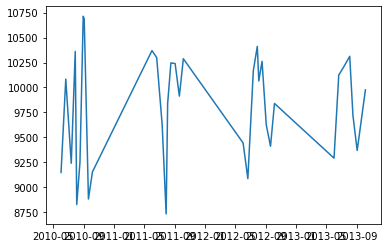

In [41]:
plt.plot(ts)

- In order to rotate the X-axis labels so that the graph is more readable, use Matplotlib's `xticks()` method and pass the amount of rotation in degrees as an argument. 
- Let's also add some more context to the graph by adding axes labeling and a title. 

Text(0.5, 1.0, 'Time Series Analysis')

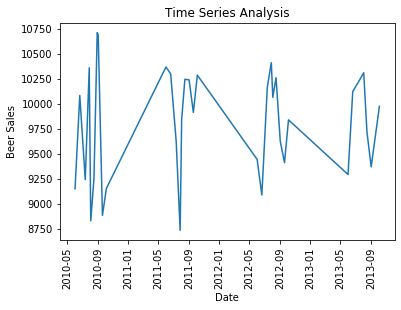

In [38]:
plt.plot(ts)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Beer Sales')
plt.title('Time Series Analysis')

Well, what do you think? 

> - The first red flag is that the X-axis label for _Date_ starts at May 2010, but from interacting so much with our dataset, we know that _Sales_ values for May are not present. Same is the case with the January values seen in the graph for years 2011 through 2013. 

So how are we going to plot the time series when some months are missing from each of our years?
> - Since we have data from 1st June to 5th October for every year, a better time series analysis would be to plot a separate line for each year instead of one continuous line. That way, we'll be comparing apples to apples instead of having Pandas assume values for months that don't exist. 

## Conclusion
This is a good stopping point for our course. We'll continue exploring this data using even more advanced Pandas techniques in our next course.

Following good practice, we're going to convert our Series to a DataFrame and save it as a CSV file.

> - To convert a Series into a DataFrame, we use the `to_frame()` method. 

Read more about the method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html).

In [39]:
ts_df = ts.to_frame()
ts_df

,Sales
Date,
2010-06-01,9150.0
2010-06-20,10084.0
2010-07-12,9242.0
2010-07-28,10361.0
2010-08-03,8829.0
2010-08-16,9253.0
2010-08-29,10713.0
2010-09-02,10689.0
2010-09-19,8884.0


In [40]:
ts_df.to_csv('Beer Sales.csv')